# Project12

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as pyfrom
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

### Data Preprocessing

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!head -n 25 adult.data

--2023-12-09 03:15:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘adult.data’

adult.data              [     <=>            ]   3.79M  3.08MB/s    in 1.2s    

2023-12-09 03:15:37 (3.08 MB/s) - ‘adult.data’ saved [3974305]

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50

In [3]:
names = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education - num',
       'Marital - status ', 'Occupation ', 'Relationship ', 'Race ', 'Sex ',
       'Capital - gain ', 'Capital - loss ', 'Hour - per - week ',
       'Native - Country ', 'Income ']

df = pd.read_csv('adult.data', header=None, names=names)

In [4]:
#Top 5 Rows
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education - num,Marital - status,Occupation,Relationship,Race,Sex,Capital - gain,Capital - loss,Hour - per - week,Native - Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.dtypes

Age                    int64
Workclass             object
Fnlwgt                 int64
Education             object
Education - num        int64
Marital - status      object
Occupation            object
Relationship          object
Race                  object
Sex                   object
Capital - gain         int64
Capital - loss         int64
Hour - per - week      int64
Native - Country      object
Income                object
dtype: object

In [7]:
df['Capital - loss '].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital - loss , Length: 92, dtype: int64

In [8]:
#Calculating Zeroes % in Capitol loss
df['Capital - loss '].eq(0).sum()/len(df)

0.9533490986149074

In [13]:
#Calculating Zeroes % in Capitol gain
df['Capital - gain '].eq(0).sum()/len(df)

0.9167101747489328

In [14]:
#Dropping the below columns
df=df.drop(['Fnlwgt', 'Education - num', 'Capital - gain ', 'Capital - loss '], axis=1)

In [16]:
#Calculating duplicate values
df.duplicated().sum()

4243

In [17]:
df=df.drop_duplicates()

In [18]:
df.duplicated().sum()

0

In [19]:
#Remaining Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28318 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 28318 non-null  int64 
 1   Workclass           28318 non-null  object
 2   Education           28318 non-null  object
 3   Marital - status    28318 non-null  object
 4   Occupation          28318 non-null  object
 5   Relationship        28318 non-null  object
 6   Race                28318 non-null  object
 7   Sex                 28318 non-null  object
 8   Hour - per - week   28318 non-null  int64 
 9   Native - Country    28318 non-null  object
 10  Income              28318 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.6+ MB


In [20]:
df.describe()

,Age,Hour - per - week
count,28318.000000,28318.000000
mean,39.245286,40.587436
std,13.758018,12.840866
min,17.000000,1.000000
25%,28.000000,38.000000
50%,38.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


In [21]:
df.isnull().sum()

Age                   0
Workclass             0
Education             0
Marital - status      0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Hour - per - week     0
Native - Country      0
Income                0
dtype: int64

In [22]:
df.eq(" ?").sum()

Age                      0
Workclass             1616
Education                0
Marital - status         0
Occupation            1623
Relationship             0
Race                     0
Sex                      0
Hour - per - week        0
Native - Country       580
Income                   0
dtype: int64

In [23]:
#Dropping rows with '?'
df.drop(df[df['Workclass'] == ' ?'].index,inplace=True)
df.drop(df[df['Occupation '] == ' ?'].index,inplace=True)
df.drop(df[df['Native - Country '] == ' ?'].index,inplace=True)

In [24]:
df.eq(" ?").sum()

Age                   0
Workclass             0
Education             0
Marital - status      0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Hour - per - week     0
Native - Country      0
Income                0
dtype: int64

In [25]:
#Random shuffling
df = df.sample(n = len(df))
df = df.reset_index(drop = True)

### Data Splitting

In [26]:
#70% training and 30% training + validation
df_valid_test = df.sample(frac=0.30)

In [27]:
#15% test and 15% valdiation
df_test = df_valid_test.sample(frac = 0.5)
df_valid = df_valid_test.drop(df_test.index)
df_train = df.drop(df_valid_test.index)

In [28]:
#Splitting data
X_train = df_train.loc[:, df_train.columns != 'Income ']
y_train = df_train['Income ']
X_valid = df_valid.loc[:, df_valid.columns != 'Income ']
y_valid = df_valid['Income ']
X_test =  df_test.loc[:, df_test.columns != 'Income ']
y_test = df_test['Income ']

In [29]:
print(X_train.shape, y_train.shape, "\n")

print(X_valid.shape, y_valid.shape, "\n")

print(X_test.shape, y_test.shape, "\n")

(18299, 10) (18299,) 

(3921, 10) (3921,) 

(3922, 10) (3922,) 



### Visualization

<Axes: >

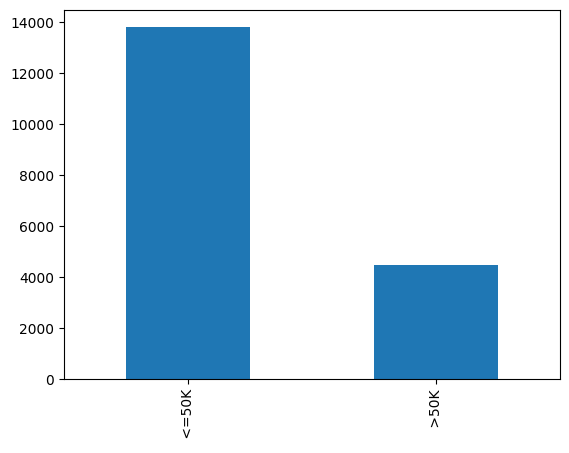

In [30]:
#Count of 2 classes in target variable
y_train.value_counts().plot(kind='bar')

In [34]:
#Grouping numerical attributes
num_attributes = X_train.select_dtypes(include=['int'])
print(num_attributes.columns)

Index(['Age', 'Hour - per - week '], dtype='object')


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Hour - per - week '}>]], dtype=object)

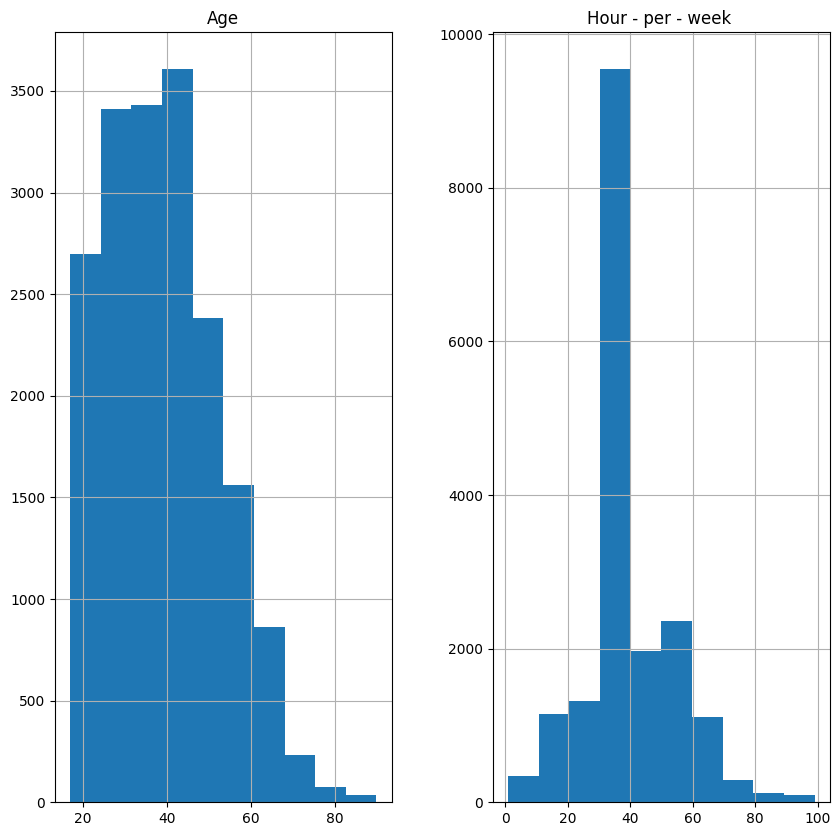

In [35]:
#Checking the distribution of features
num_attributes.hist(figsize=(10,10))

In [36]:
#Grouping categorical attributes
cat_attributes = X_train.select_dtypes(include=['object'])
print(cat_attributes.columns)

Index(['Workclass', 'Education', 'Marital - status ', 'Occupation ',
       'Relationship ', 'Race ', 'Sex ', 'Native - Country '],
      dtype='object')


<Axes: xlabel='count', ylabel='Workclass'>

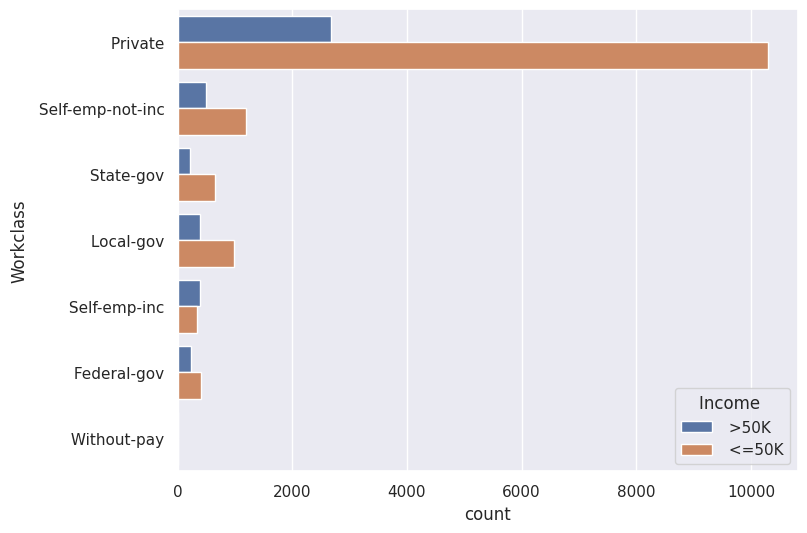

In [ ]:
#Count of income classes for each workclass category
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(y='Workclass', hue=y_train, data = cat_attributes)

<Axes: xlabel='count', ylabel='Occupation '>

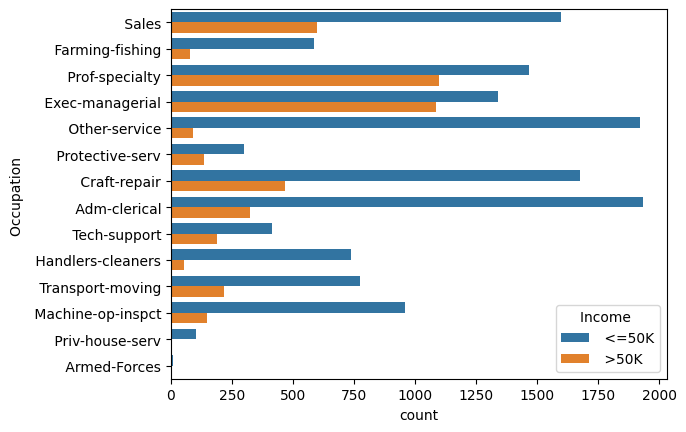

In [37]:
#Count of income classes for each Occupation category
sns.countplot(y='Occupation ', hue= y_train, data=cat_attributes)

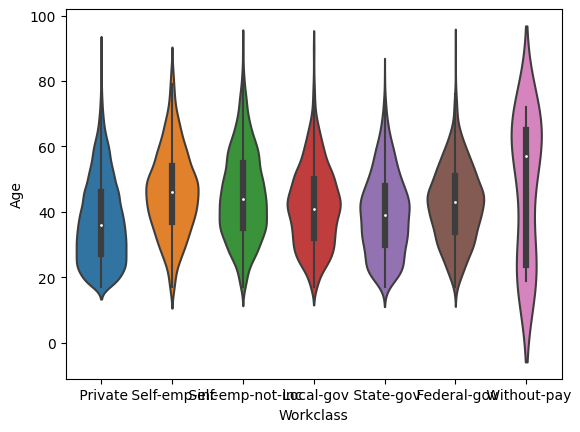

In [38]:
#Violin plot between
sns.violinplot( x='Workclass', y='Age', data=df)
plt.show()

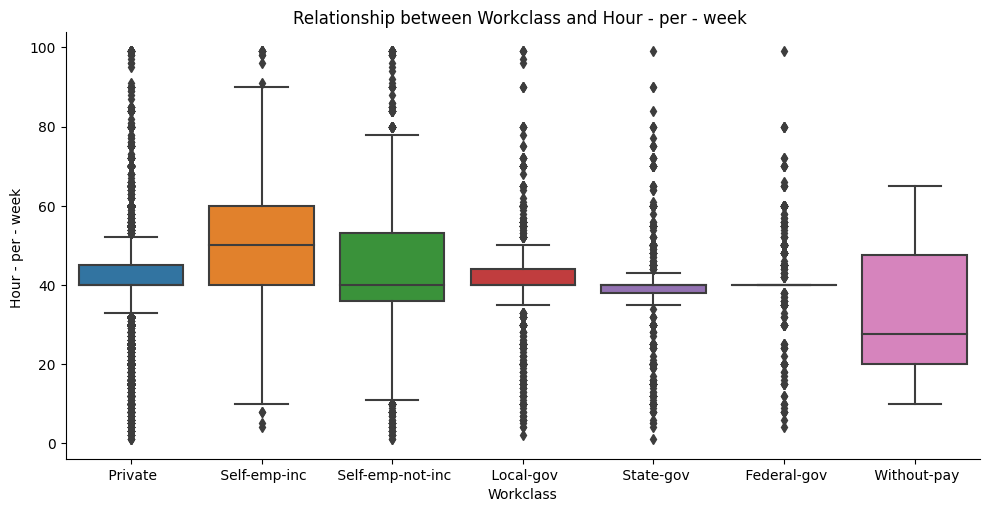

In [39]:
#Box plot between Workclass and Hours-per-week
sns.catplot(data=df, x='Workclass', y='Hour - per - week ', kind= 'box', aspect=2)
plt.title('Relationship between Workclass and Hour - per - week ')
plt.show()

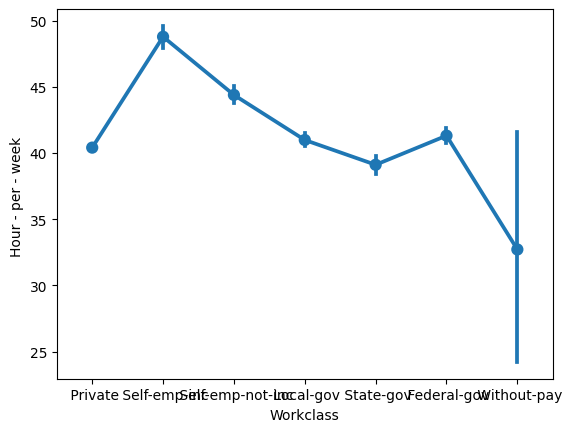

In [40]:
#Point plot between Workclass and Hours-per-week
sns.pointplot( x='Workclass', y='Hour - per - week ', data=df)
plt.show()

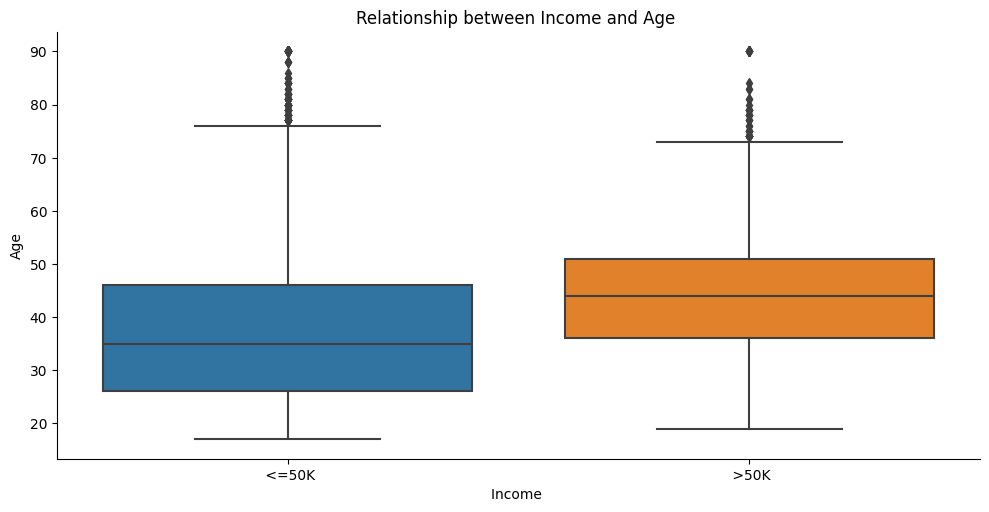

In [41]:
#Box plot between Income and Age
sns.catplot(data=df, x='Income ', y='Age', kind= 'box', aspect=2)
plt.title('Relationship between Income and Age ')
plt.show()

### Normalization

In [42]:


# Assuming categorical_features is a list of column names
categorical_features = ['Education', 'Marital - status ', 'Relationship ', 'Race ', 'Sex ', 'Native - Country ','Workclass','Occupation ' ]
target_feature = y_train

# Create a copy of the original DataFrame
X_train_encoded = X_train.copy()
X_valid_encoded = X_valid.copy()
X_test_encoded = X_test.copy()
y_train_encoded = y_train.copy()
y_valid_encoded = y_valid.copy()
y_test_encoded = y_test.copy()

# Apply label encoding for X_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_encoded)
y_valid_encoded = label_encoder.fit_transform(y_valid_encoded)
y_test_encoded = label_encoder.fit_transform(y_test_encoded)
for feature in categorical_features:
    X_train_encoded[feature] = label_encoder.fit_transform(X_train_encoded[feature])
    X_valid_encoded[feature] = label_encoder.fit_transform(X_valid_encoded[feature])
    X_test_encoded[feature] = label_encoder.fit_transform(X_test_encoded[feature])



In [ ]:
#Scaling the features
scaler = StandardScaler()

X_train_encoded = pd.DataFrame(scaler.fit_transform(X_train_encoded), columns = X_train_encoded.columns)
X_valid_encoded = pd.DataFrame(scaler.fit_transform(X_valid_encoded), columns = X_valid_encoded.columns)
X_test_encoded = pd.DataFrame(scaler.fit_transform(X_test_encoded), columns = X_test_encoded.columns)

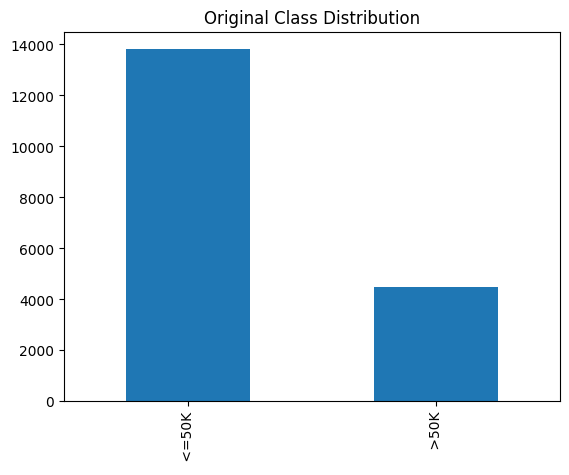

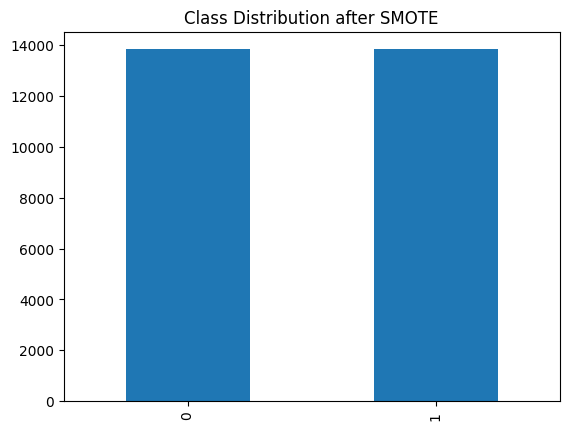

In [43]:
# Assuming X_train and y_train are your training data
# Assuming 'Income' is the column name you are trying to balance

# Display value counts of the 'Income' column using a bar plot
y_train.value_counts().plot(kind='bar')
plt.title('Original Class Distribution')
plt.show()

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train_encoded)

# Convert y_resampled to a pandas Series and then plot the value counts
y_resampled_series = pd.Series(y_resampled)

# Plot the value counts
y_resampled_series.value_counts().plot(kind='bar')
plt.title('Class Distribution after SMOTE')
plt.show()

In [45]:
#Funtion to print performance metrics
def print_report(y_actual, y_pred, thresh):
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)
    print(f'AUC : {auc}')
    print(f'Accuracy : {accuracy}')
    print(f'Recall : {recall}')
    print(f'Precision : {precision}')
    print(f'Specificity : {specificity}')
    #print(f'Prevalence : {calc_prevalence(y_actual)}')
    return auc, accuracy, recall, precision, specificity

In [46]:
thresh = 0.5

## Logistic Regression


In [47]:
#LOGISTIC REGRESSION Using Sklearn


lr = LogisticRegression(max_iter = 1000)
lr.fit(X_resampled, y_resampled)

y_train_preds = lr.predict_proba(X_resampled)[:,1]
y_valid_preds = lr.predict_proba(X_valid_encoded)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_resampled, y_train_preds, thresh)

print('\nValidation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid_encoded, y_valid_preds, thresh)

Logistic Regression
Training:
AUC : 0.7629812596498715
Accuracy : 0.7107129931234166
Recall : 0.7705392689106044
Precision : 0.6881949831911042
Specificity : 0.6508867173362287

Validation:
AUC : 0.7418983927262104
Accuracy : 0.663861259882683
Recall : 0.7049525816649105
Precision : 0.39191564147627417
Specificity : 0.6507402422611036


In [48]:
print(lr.coef_, lr.intercept_)

[[ 0.03589776 -0.25262018  0.05462661 -0.2787225   0.02024245 -0.21641028
   0.1168071   0.29131488  0.03485204 -0.00223885]] [-2.77822398]


In [49]:
class LogisticRegression:
    def __init__(self, X_train, y_train,X_test,y_test,learningRate, tolerance, maxIteration=20000, index=[], drop=False):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        self.index=index
        self.drop=drop

    def addX0(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X])

    def sigmoid(self,z):
        sig=1/(1+np.exp(-z))
        return sig

    def costFunction(self,X,y):
        sig=self.sigmoid(X.dot(self.w))
        pred=y*np.log(sig)+(1-y)*np.log(1-sig)
        cost=pred.sum()
        return cost

    def gradient(self, X,y):
        sig=self.sigmoid(X.dot(self.w))
        grad=(sig-y).dot(X)
        return grad

    def gradientDescent(self,X,y):
        costSequence=[]
        last=float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate*(self.gradient(X,y))
            cur_cost= self.costFunction(X,y)
            diff=last-cur_cost
            costSequence.append(abs(cur_cost))
            if diff<self.tolerance:
                print("Model stopped")
                break
        self.plotCost(costSequence)
        return

    def plotCost(self, costSequence):
        axis=list(range(0, len(costSequence),1))
        fig, ax = plt.subplots()
        ax.plot(axis, costSequence)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Cost Function')
        ax.set_title('Cost Function')
        ax.grid()
        plt.show()

    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)

    def evaluate(self, y, y_hat):
        y = (y==1)
        y_hat = (y_hat==1)
        accuracy= (y==y_hat).sum()/y.size
        recall=(y&y_hat).sum()/y.sum()
        return accuracy, recall

    def runModel(self):
        self.X_train, self.y_train, self.X_test, self.y_test = self.X_train, self.y_train, self.X_test, self.y_test
        self.w=np.ones(self.X_train.shape[1], dtype=np.float64)*0
        self.gradientDescent(self.X_train, self.y_train)
        print('The model params are {}'.format(self.w))

        y_hat_train=self.predict(self.X_train)
        accuracy, recall = self.evaluate(self.y_train, y_hat_train)

        print("Evaluation for training data: \n")
        print("Accuracy", accuracy)
        print("Recall", recall)

        y_hat_test=self.predict(self.X_test)
        accuracy_test, recall_test = self.evaluate(self.y_test, y_hat_test)

        print("\nEvaluation for test data: \n")
        print("Accuracy", accuracy_test)
        print("Recall", recall_test)


        return

In [50]:
#For validation data
regression = LogisticRegression(X_resampled, y_resampled, X_valid_encoded, y_valid_encoded, learningRate=0.00000001, tolerance=0.001)

100%|██████████| 20000/20000 [03:06<00:00, 107.42it/s]


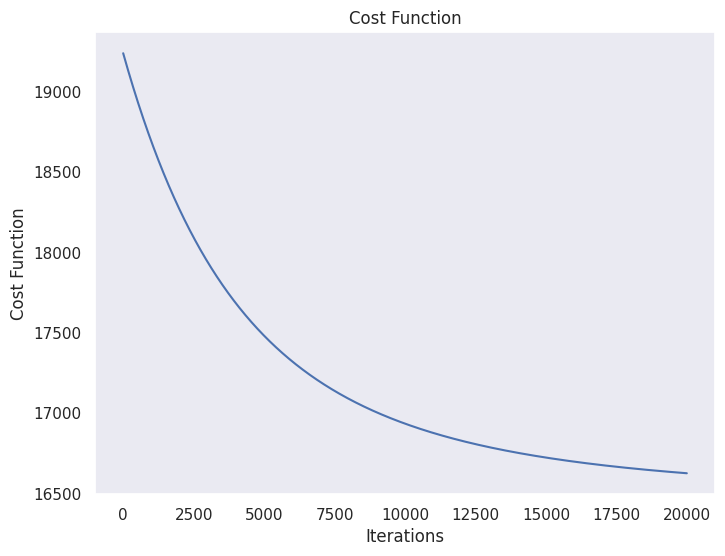

The model params are Age                   0.314456
Workclass            -0.010463
Education             0.141447
Marital - status     -0.254593
Occupation            0.068868
Relationship         -0.214204
Race                  0.083755
Sex                   0.211536
Hour - per - week     0.308247
Native - Country      0.023967
dtype: float64
Evaluation for training data: 

Accuracy 0.6943223575185532
Recall 0.8258520066287196

Evaluation for test data: 

Accuracy 0.6230553430247386
Recall 0.8281893004115226


In [ ]:
regression.runModel()

In [51]:
#For test data
regression = LogisticRegression(X_resampled, y_resampled, X_test_encoded, y_test_encoded, learningRate=0.0000001, tolerance=0.001)

100%|██████████| 20000/20000 [03:08<00:00, 106.29it/s]


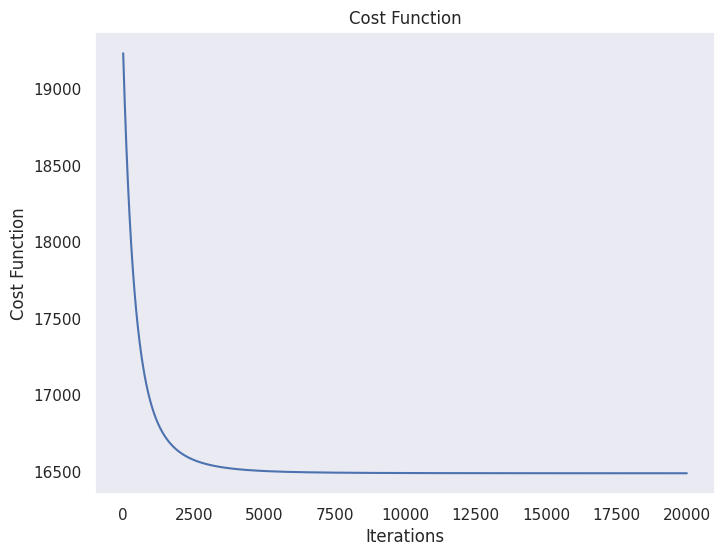

The model params are Age                   0.471678
Workclass            -0.052234
Education             0.224129
Marital - status     -0.317515
Occupation            0.096394
Relationship         -0.121933
Race                  0.093075
Sex                   0.281261
Hour - per - week     0.450956
Native - Country      0.016352
dtype: float64
Evaluation for training data: 

Accuracy 0.694754665321709
Recall 0.8257079040276677

Evaluation for test data: 

Accuracy 0.6455889852116268
Recall 0.8298918387413963


In [ ]:
regression.runModel()

## Logistic Regression With Regularization

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class LogisticRegressionReg:
    def __init__(self, X_train, y_train, X_test, y_test, learningRate, tolerance, regularization_param=0.001, maxIteration=20000, index=[], drop=False):
        self.X_train = self.addX0(X_train)
        self.y_train = y_train
        self.X_test = self.addX0(X_test)
        self.y_test = y_test
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.index = index
        self.drop = drop
        self.regularization_param = regularization_param

    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])

    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig

    def costFunction(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        pred = y * np.log(sig) + (1 - y) * np.log(1 - sig)
        regularization_term = (self.regularization_param / (2 * len(y))) * np.sum(self.w[1:]**2)  # L2 regularization
        cost = -pred.sum() + regularization_term
        return cost

    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        regularization_term = self.regularization_param / len(y) * np.concatenate(([0], self.w[1:]))  # L2 regularization
        grad += regularization_term
        return grad

    def gradientDescent(self, X, y):
        costSequence = []
        last = float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * (self.gradient(X, y))
            cur_cost = self.costFunction(X, y)
            diff = last - cur_cost
            costSequence.append(abs(cur_cost))
            if diff < self.tolerance:
                print("Model stopped")
                break
        self.plotCost(costSequence)
        return

    def plotCost(self, costSequence):
        axis = list(range(0, len(costSequence), 1))
        fig, ax = plt.subplots()
        ax.plot(axis, costSequence)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Cost Function')
        ax.set_title('Cost Function')
        ax.grid()
        plt.show()

    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)

    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
        accuracy = (y == y_hat).sum() / y.size
        recall = (y & y_hat).sum() / y.sum()
        return accuracy, recall

    def runModel(self):
        self.X_train, self.y_train, self.X_test, self.y_test = self.X_train, self.y_train, self.X_test, self.y_test
        self.w = np.ones(self.X_train.shape[1], dtype=np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        print('The model params are {}'.format(self.w))

        y_hat_train = self.predict(self.X_train)
        accuracy, recall = self.evaluate(self.y_train, y_hat_train)

        print("Evaluation for training data: \n")
        print("Accuracy", accuracy)
        print("Recall", recall)

        y_hat_test = self.predict(self.X_test)
        accuracy_test, recall_test = self.evaluate(self.y_test, y_hat_test)

        print("\nEvaluation for test data: \n")
        print("Accuracy", accuracy_test)
        print("Recall", recall_test)

        return

# Example usage:
# Replace X_train, y_train, X_test, y_test with your actual data
# Set appropriate values for learningRate, tolerance, regularization_param
# Initialize the LogisticRegression class and call runModel method


In [53]:
#For validation data
reg = LogisticRegressionReg(X_resampled, y_resampled, X_valid_encoded, y_valid_encoded, learningRate=0.00000001, tolerance=0.001)

100%|██████████| 20000/20000 [01:31<00:00, 218.62it/s]


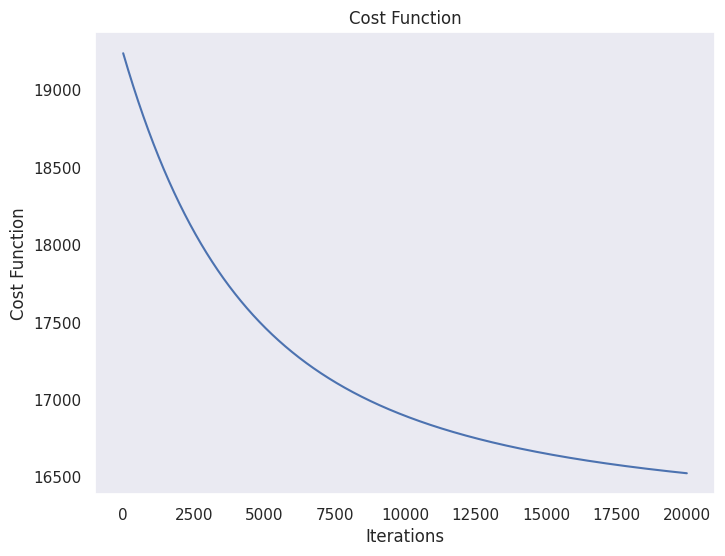

The model params are [-0.10420062  0.31905869 -0.01068975  0.14349133 -0.25919972  0.06963269
 -0.21888966  0.08544235  0.21580313  0.3127838   0.02421832]
Evaluation for training data: 

Accuracy 0.7013473593198357
Recall 0.7998414871388428

Evaluation for test data: 

Accuracy 0.6526396327467483
Recall 0.8127572016460906


In [ ]:
reg.runModel()

In [ ]:
#For test data
reg = LogisticRegressionReg(X_resampled, y_resampled, X_test_encoded, y_test_encoded, learningRate=0.00000001, tolerance=0.001)

100%|██████████| 20000/20000 [01:28<00:00, 225.06it/s]


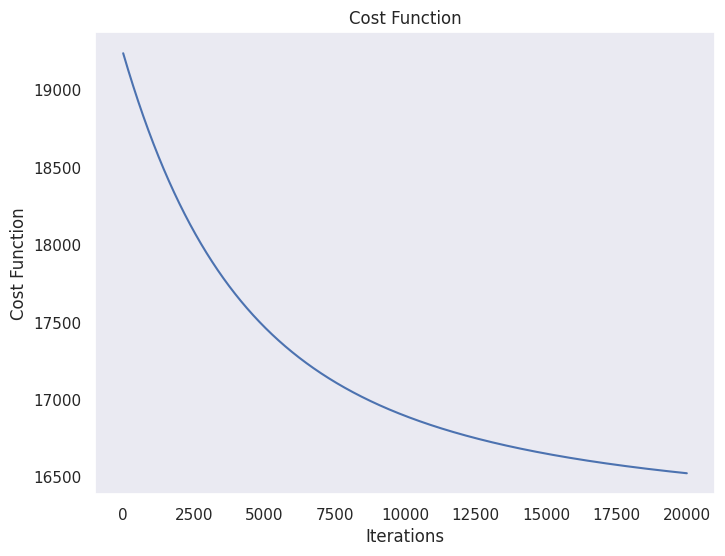

The model params are [-0.10420062  0.31905868 -0.01068975  0.14349133 -0.25919971  0.06963269
 -0.21888966  0.08544235  0.21580312  0.3127838   0.02421832]
Evaluation for training data: 

Accuracy 0.7013473593198357
Recall 0.7998414871388428

Evaluation for test data: 

Accuracy 0.6695563488016318
Recall 0.8112094395280236


In [ ]:
reg.runModel()

## Naive bayes

In [66]:
#Label Encoding
y_train_nb=y_train.copy()
y_valid_nb=y_valid.copy()
y_test_nb=y_test.copy()
X_train_nb=X_train.copy()
X_valid_nb=X_valid.copy()

In [67]:
X_train_nb.columns

Index(['Age', 'Workclass', 'Education', 'Marital - status ', 'Occupation ',
       'Relationship ', 'Race ', 'Sex ', 'Hour - per - week ',
       'Native - Country '],
      dtype='object')

In [68]:
def accuracy_score(y_true, y_pred):

	#Calculate the accuracy score

	return round(float(sum(y_pred == y_true))/float(len(y_true)) * 100 ,2)


class  NaiveBayes:

  def _calc_class_prior(self):


    for outcome in np.unique(self.y_train_nb):
      outcome_count = sum(self.y_train_nb == outcome)
      self.class_priors[outcome] = outcome_count / self.train_size

  def _calc_likelihoods(self):
    # Loop over each feature in the dataset
    for feature in self.features:
      # Loop over each unique outcome in the target variable
      for outcome in np.unique(self.y_train_nb):
        # Count the occurrences of the current outcome in the target variable
        outcome_count = sum(self.y_train_nb == outcome)
         # Count the occurrences of each unique value in the subset and convert to a dictionary
        feat_likelihood = self.X_train[feature][self.y_train_nb[self.y_train_nb == outcome].index.values.tolist()].value_counts().to_dict()
        # Loop over each unique value and its count in the subset
        for feat_val, count in feat_likelihood.items():
          self.likelihoods[feature][f"{feat_val}_{outcome}"] = count/outcome_count

  def _calc_predictor_prior(self):
    # Loop over each feature in the dataset
    for feature in self.features:
      # Count the occurrences of each unique value in the current feature and convert to a dictionary
      feat_vals = self.X_train[feature].value_counts().to_dict()

      for feat_val, count in feat_vals.items():
         # Calculate and store the prior probability for the current feature value
        self.pred_priors[feature][feat_val] = count/self.train_size

  def __init__(self):

    self.features = list
    self.likelihoods = {}
    self.class_priors = {}
    self.pred_priors = {}

    self.X_train = np.array
    self.y_train_nb = np.array
    self.train_size = int
    self.num_feats = int


  def fit(self, X, y):

    self.features = list(X.columns)

    # Set the training data, target variable, and relevant attributes
    self.X_train = X
    self.y_train_nb = y
    self.train_size = X.shape[0]
    self.num_feats = X.shape[1]


    # Initialize likelihoods and predictor priors for each feature
    for feature in self.features:
      self.likelihoods[feature] = {}
      self.pred_priors[feature] = {}

      # Loop over each unique value of the current feature in the training data
      for feat_val in np.unique(self.X_train[feature]):
        self.pred_priors[feature].update({feat_val: 0})

        # Loop over each unique outcome in the target variable
        for outcome in np.unique(self.y_train_nb):
          # Initialize likelihoods for each unique combination of feature value and outcome
          self.likelihoods[feature].update({f"{feat_val}_{outcome}":0})
          # Initialize class priors for each unique outcome
          self.class_priors.update({outcome: 0})

    # Calculate class priors, likelihoods, and predictor priors using helper methods
    self._calc_class_prior()
    self._calc_likelihoods()
    self._calc_predictor_prior()




  def predict(self, X):
    """Calculates Posterior probability P(c|x)"""
    # Initialize an empty list to store the predicted outcomes
    results = []
    X = np.array(X)

    # Loop over each query (set of features) in the input data
    for query in X:

      # Initialize an empty dictionary to store the posterior probabilities for each outcome
        probs_outcome = {}

        # Loop over each unique outcome in the training data
        for outcome in np.unique(self.y_train_nb):

          # Retrieve the prior probability for the current outcome
            prior = self.class_priors[outcome]

            # Initialize likelihood and evidence
            likelihood = 1
            evidence = 1

            # Loop over each feature and its value in the current query
            for feat, feat_val in zip(self.features, query):
              # Update likelihood with the probability of the feature value given the outcome
                likelihood *= self.likelihoods[feat].get(f"{feat_val}_{outcome}", 0)
                 # Update evidence with the probability of the feature value
                evidence *= self.pred_priors[feat].get(feat_val, 0)

            # Avoid division by zero by ensuring evidence is not zero
            if evidence != 0:
              # Calculate the posterior probability for the current outcome
                posterior = (likelihood * prior) / evidence
                probs_outcome[outcome] = posterior

        # Check if the dictionary of posterior probabilities is not empty
        if probs_outcome:
          # Select the outcome with the maximum posterior probability as the predicted outcome
            result = max(probs_outcome, key=probs_outcome.get)
            results.append(result)
        else:
            # Handle the case where probs_outcome is empty (no evidence for any outcome)
            results.append(None)

    return np.array(results)

if __name__ == "__main__":
  nb_clf = NaiveBayes()
  nb_clf.fit(X_train_nb, y_train_nb)
  out=nb_clf.predict(X_valid_nb)


In [69]:
out

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype=object)

In [70]:
out = pd.Series(out)

In [71]:
out=out.apply(lambda x: 0 if x==' <=50K' else 1)
y_valid_nb=y_valid_nb.apply(lambda x: 0 if x==' <=50K' else 1)


In [72]:
out

0       0
1       0
2       0
3       0
4       0
       ..
3916    0
3917    0
3918    1
3919    0
3920    1
Length: 3921, dtype: int64

In [73]:
y_valid_nb

20194    0
17791    0
17326    0
8058     0
14569    0
        ..
23070    0
16942    0
23026    1
8189     0
25759    1
Name: Income , Length: 3921, dtype: int64

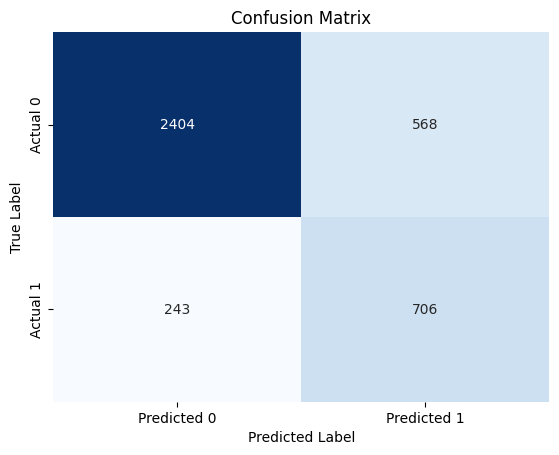

In [74]:
# Create a confusion matrix
cm = confusion_matrix(y_valid_nb, out)

# Plotting the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [77]:
#please run the libraries again if an error is thrown
accuracy = accuracy_score(y_valid_nb, out)
precision = precision_score(y_valid_nb, out)
recall = recall_score(y_valid_nb, out)
f1 = f1_score(y_valid_nb, out)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7931650089262943
Precision: 0.554160125588697
Recall: 0.743940990516333
F1-Score: 0.6351776878092668


## Neural Networks

In [79]:
# Build the neural network model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_resampled.shape[1], activation='relu'))
model.add(Dropout(0.5))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_resampled, y_resampled, epochs=20, batch_size=64, validation_data=(X_valid_encoded, y_valid_encoded))

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_encoded)
y_pred = (y_pred_prob > thresh).astype(int)

# Print evaluation metrics
print_report(y_test_encoded, y_pred_prob, thresh)

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/20
 24/432 [>.............................] - ETA: 0s - loss: 4.5027 - accuracy: 0.4837  

KeyboardInterrupt: ignored